In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [3]:
imgs_path = "../input/gtsrb-german-traffic-sign/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")

Done


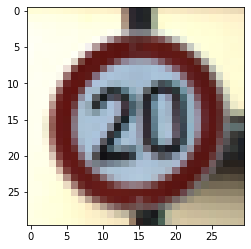

In [4]:
path = "../input/gtsrb-german-traffic-sign/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.1, random_state=10)

print("training_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)

y_train = tf.one_hot(y_train,43)
y_test = tf.one_hot(y_test,43)

training_shape:  (35288, 30, 30, 3) (35288,)
testing_shape:  (3921, 30, 30, 3) (3921,)


In [6]:
#building the CNN Model
#Adding a Convnet of 32 filters and relu activation
#Adding a Convnet of 32 filters and relu activation
#Adding a Maxpool Layer of (2,2)
#Adding Dropout Regularization with rate= 0.25
#Adding a Convnet of 64 filters and relu activation
#Adding a MaxPool layer of (2,2)
#Adding a Dropout Regularization with rate = 0.25
#Flattening the Model
#Dense layer with Tanh activation 
#Final Softmax to categorize the data

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu")) 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.40))
model.add(tf.keras.layers.Dense(43, activation="softmax"))


In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
552/552 [==============================] - 74s 132ms/step - loss: 4.9495 - accuracy: 0.2772 - val_loss: 0.5344 - val_accuracy: 0.8990
Epoch 2/15
552/552 [==============================] - 72s 130ms/step - loss: 0.7207 - accuracy: 0.7946 - val_loss: 0.1802 - val_accuracy: 0.9635
Epoch 3/15
552/552 [==============================] - 73s 132ms/step - loss: 0.3661 - accuracy: 0.8974 - val_loss: 0.1297 - val_accuracy: 0.9758
Epoch 4/15
552/552 [==============================] - 73s 132ms/step - loss: 0.2839 - accuracy: 0.9202 - val_loss: 0.0745 - val_accuracy: 0.9839
Epoch 5/15
552/552 [==============================] - 72s 130ms/step - loss: 0.2141 - accuracy: 0.9423 - val_loss: 0.0815 - val_accuracy: 0.9814
Epoch 6/15
552/552 [==============================] - 72s 130ms/step - loss: 0.1932 - accuracy: 0.9479 - val_loss: 0.0516 - val_accuracy: 0.9893
Epoch 7/15
552/552 [==============================] - 72s 130ms/step - loss: 0.1609 - accuracy: 0.9554 - val_loss: 0.0705 - val_ac

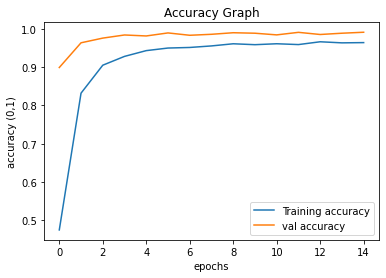

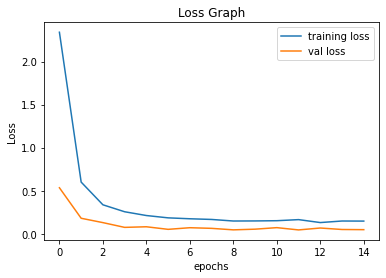

In [9]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:

from sklearn.metrics import accuracy_score
test = pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "../input/gtsrb-german-traffic-sign"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

(12630, 30, 30, 3)


array([16,  1, 38, ...,  6,  7, 10])

In [11]:
predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, predictions))

accuracy:  0.9661124307205067


In [12]:
model.save('traffic_signal_classifier.h5')